Sample Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Label distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64


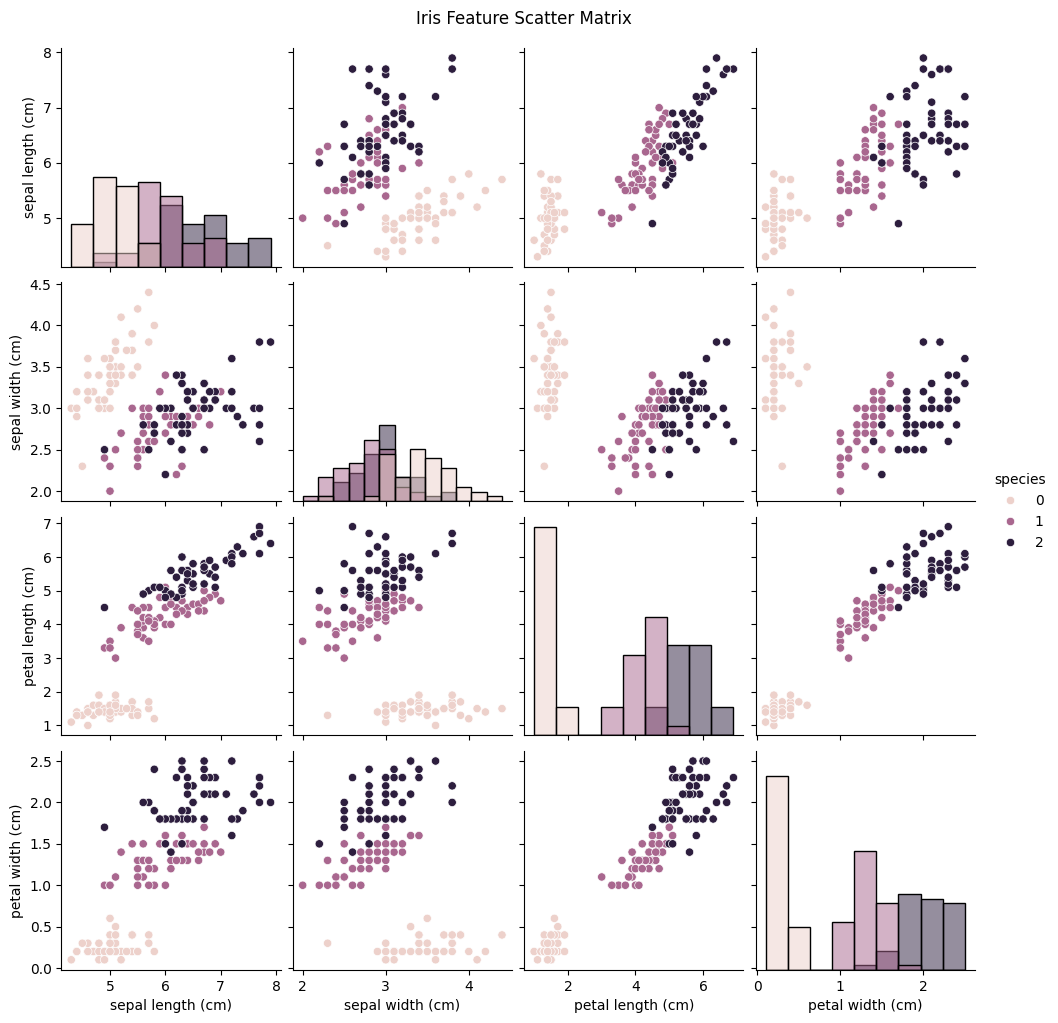


Train size: 112, Test size: 38

Logistic Regression Accuracy: 0.9210526315789473
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



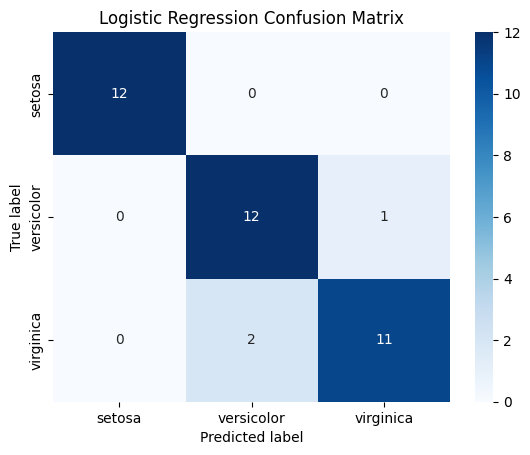

5-Fold CV Logistic Regression: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean: 0.9733333333333334

Random Forest Accuracy: 0.9210526315789473
Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



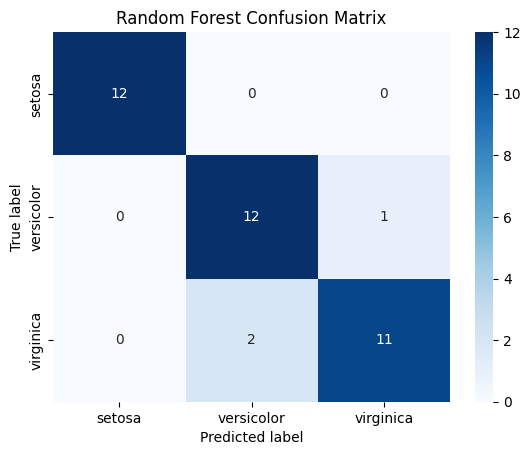

5-Fold CV Random Forest: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean: 0.9666666666666668

Best Params: {'max_depth': 2, 'n_estimators': 10}
Best CV Score: 0.9640316205533598

Tuned Random Forest Accuracy: 0.9210526315789473
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df["species"] = y

print("Sample Data:")
print(df.head())

print("\nLabel distribution:")
print(df["species"].value_counts())

sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Iris Feature Scatter Matrix", y=1.02)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nTrain size: {len(X_train)}, Test size: {len(X_test)}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=target_names))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

lr_cv_scores = cross_val_score(lr, X, y, cv=5)
print("5-Fold CV Logistic Regression:", lr_cv_scores)
print("Mean:", lr_cv_scores.mean())

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("5-Fold CV Random Forest:", rf_cv_scores)
print("Mean:", rf_cv_scores.mean())

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [2, 4, 6, None]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("\nBest Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))